In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
dane <- read.table("pozyczka.csv", sep=";", header=T)

In [4]:
head(dane)

,plec,stan_cyw,samozatr,dochod,suma_poz,historia,miejsce_zam,pozyczka
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,1,0,4583,128,1,2,0
2,0,1,1,3000,66,1,0,1
3,0,1,0,2583,120,1,0,1
4,0,0,0,6000,141,1,0,1
5,0,1,1,5417,267,1,0,1
6,0,1,0,2333,95,1,0,1


In [5]:
dane$plec <- as.factor(dane$plec)
dane$stan_cyw <- as.factor(dane$stan_cyw)
dane$samozatr <- as.factor(dane$samozatr)
dane$historia <- as.factor(dane$historia)
dane$miejsce_zam <- as.factor(dane$miejsce_zam)
dane$pozyczka <- as.factor(dane$pozyczka)

In [6]:
model <- glm(pozyczka ~ plec + stan_cyw + samozatr + historia + miejsce_zam + dochod + suma_poz, dane, family = binomial)
summary(model)


Call:
glm(formula = pozyczka ~ plec + stan_cyw + samozatr + historia + 
    miejsce_zam + dochod + suma_poz, family = binomial, data = dane)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2364  -0.4218   0.5202   0.6916   2.4294  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.456e+00  5.175e-01  -4.746 2.08e-06 ***
plec1        -3.133e-01  3.217e-01  -0.974  0.33016    
stan_cyw1     5.898e-01  2.669e-01   2.209  0.02715 *  
samozatr1    -1.628e-01  3.474e-01  -0.469  0.63940    
historia1     3.625e+00  4.273e-01   8.484  < 2e-16 ***
miejsce_zam1  8.293e-01  3.028e-01   2.739  0.00617 ** 
miejsce_zam2 -1.353e-01  2.899e-01  -0.467  0.64079    
dochod        1.599e-05  2.718e-05   0.588  0.55630    
suma_poz     -2.959e-03  1.691e-03  -1.749  0.08022 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 593.05  on 479  degrees 

In [13]:
cor(as.numeric(dane$historia),as.numeric(dane$pozyczka))

[1] 0.5293898

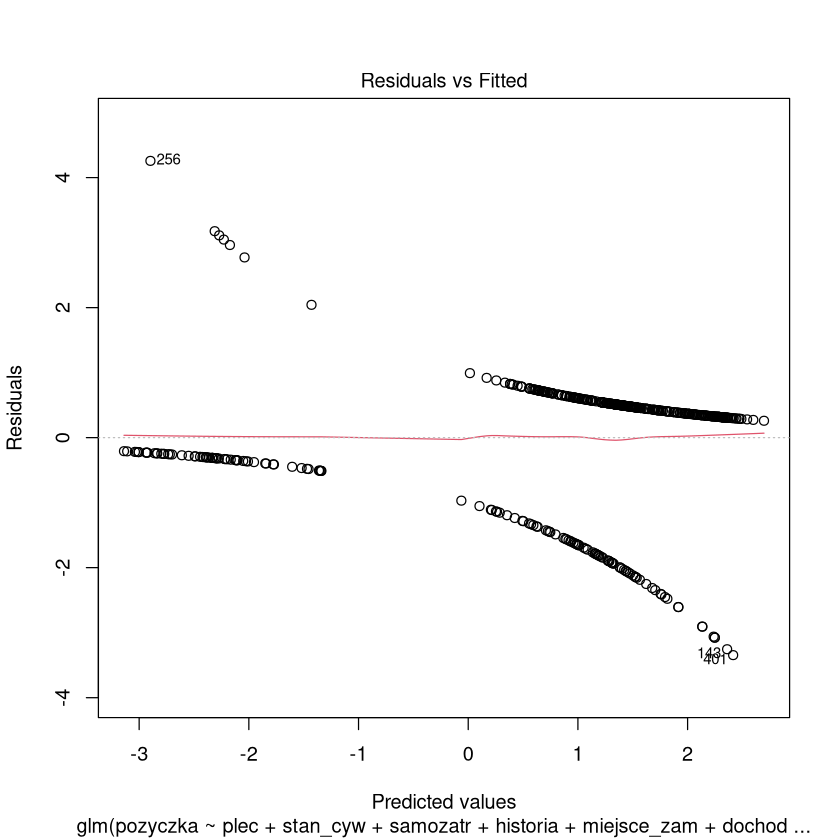

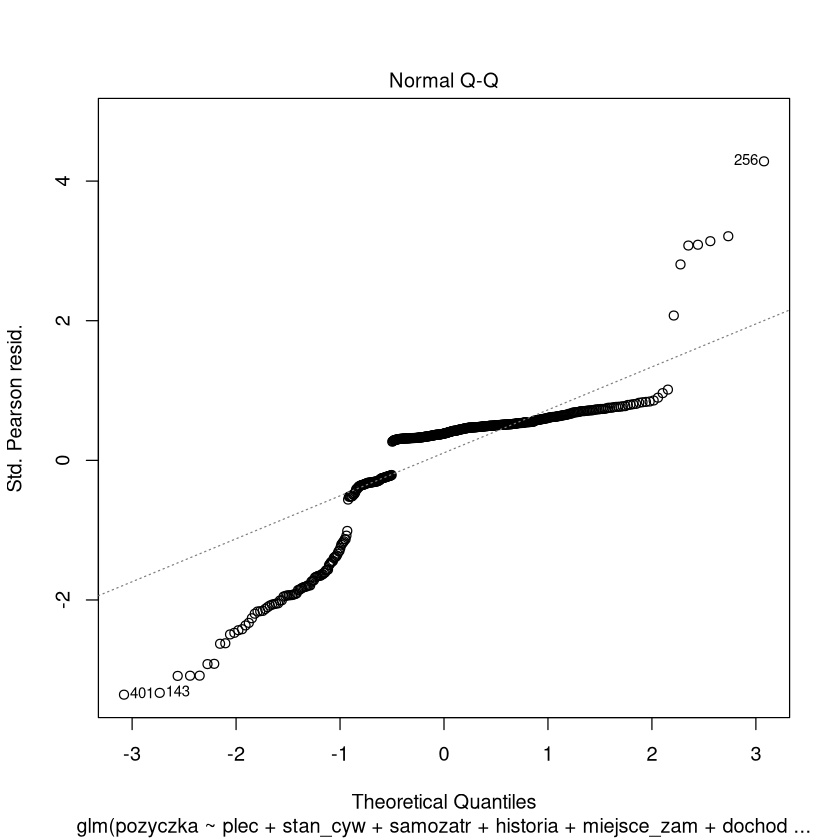

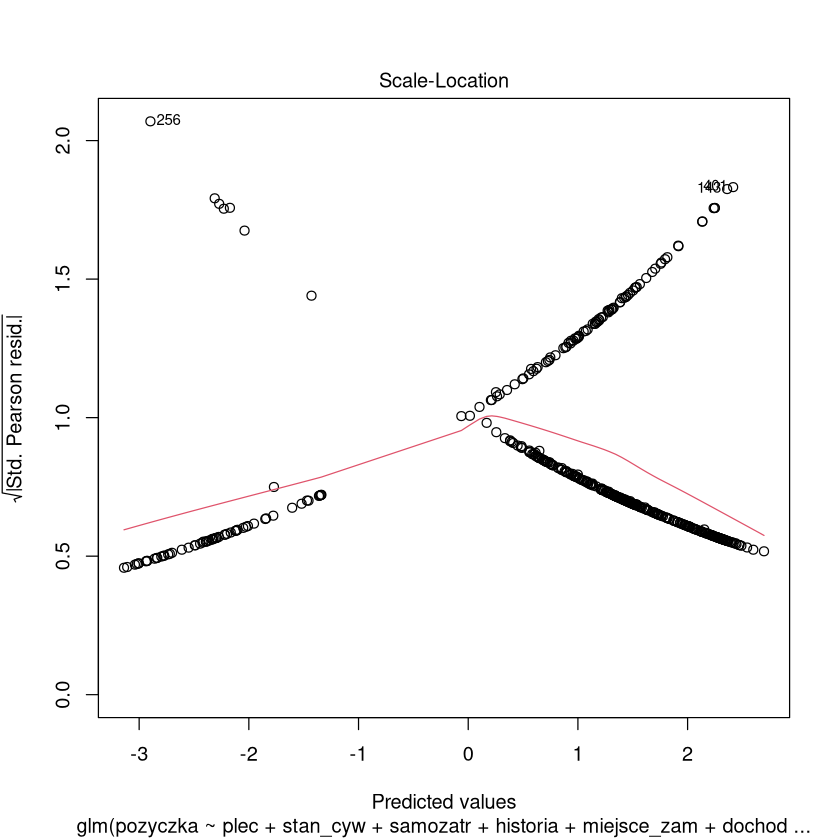

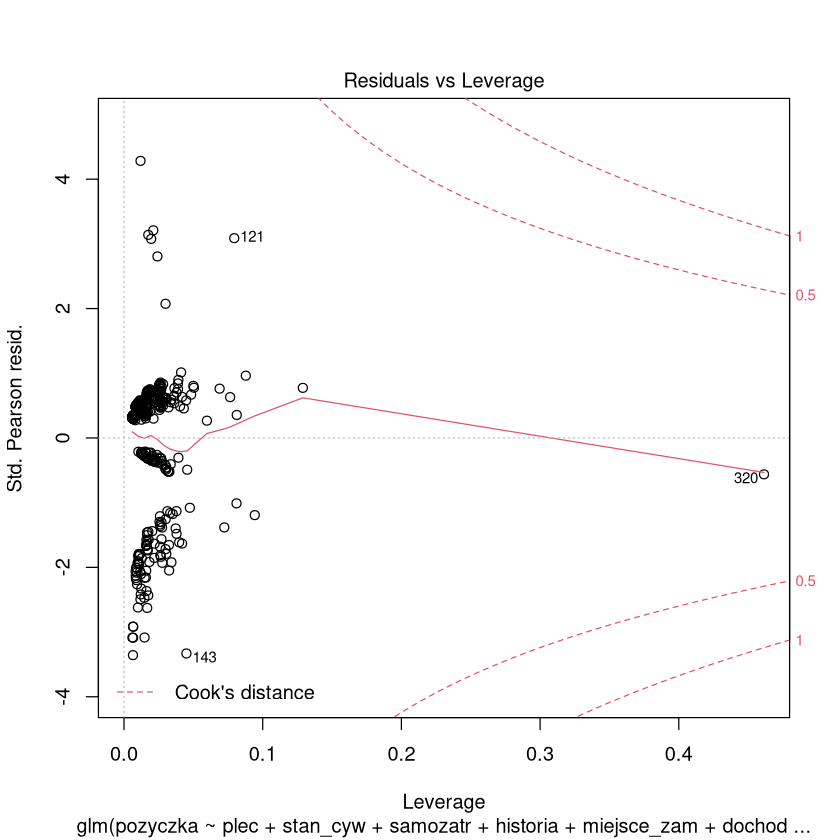

In [17]:
plot(model)

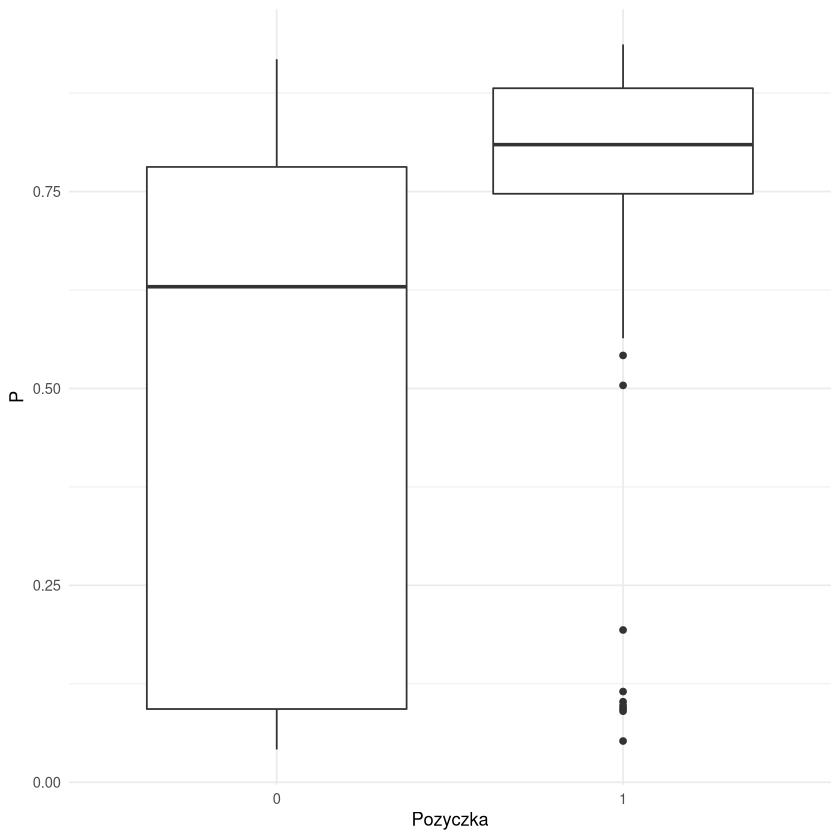

In [19]:
prawdopodobienstwa <- predict(model, type = "response")
ggplot(data = data.frame('P' = prawdopodobienstwa, 'Pozyczka' = dane$pozyczka)) + geom_boxplot(aes(x = Pozyczka, y = P)) + theme_minimal()

In [22]:
predykcja <- ifelse(prawdopodobienstwa  > 0.5, "1", "0")
conf.matrix <- table('Pred'=predykcja, 'True'=dane$pozyczka)

In [23]:
accuracy <- sum(diag(conf.matrix))/sum(conf.matrix)  # suma wartości na przekątnej dzielona przez sumę wszystkich wartości macierzy
sensitivity <- conf.matrix[2, 2]/(conf.matrix[1,2]+conf.matrix[2,2])
specificity <- conf.matrix[1, 1]/(conf.matrix[1,1]+conf.matrix[2,1])
precision <- conf.matrix[2, 2]/(conf.matrix[2,1] + conf.matrix[2, 2])
c('Dokładność' = accuracy, 'Czułość' = sensitivity, 'Specyficzność' = specificity, "Precyzja" = precision)

Dokładność       Czułość Specyficzność      Precyzja 
    0.8104167     0.9789157     0.4324324     0.7946210

In [26]:
progi <- seq(0.4, 0.9, length.out = 20)
macierz_predykcji <- sapply(progi, function(p) prawdopodobienstwa > p) 
                            P <- sum(dane$pozyczka == 1)  
N <- sum(dane$pozyczka == 0)
TPR <- apply(macierz_predykcji, 2, function(x) sum(x & dane$pozyczka==1))/P
FPR <- apply(macierz_predykcji, 2, function(x) sum(x & dane$pozyczka==0))/N
             

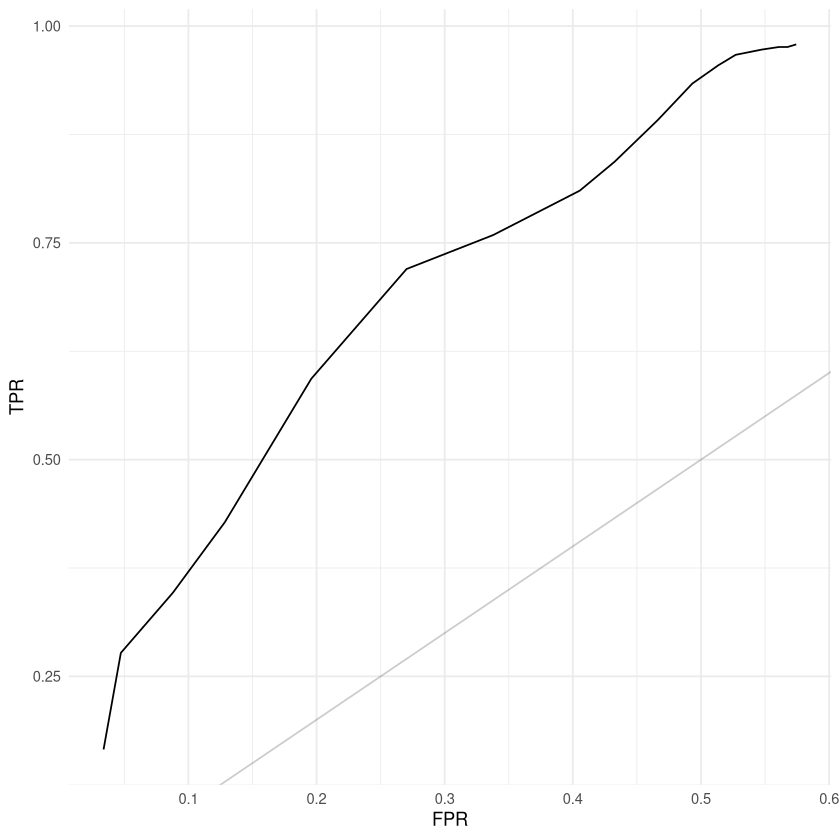

In [27]:
ggplot(data.frame('TPR' = TPR, 'FPR' = FPR, 'p' = progi)) + geom_line(aes(x=FPR, y=TPR)) + geom_abline(slope=1, intercept=0, alpha=0.2) + theme_minimal() 